In [385]:
import json
import itertools
import requests

import pandas as pd
import numpy as np
import networkx as nx
import pyvis.network as pn
import regex as re

import matplotlib.pyplot as plt

from zipfile import ZipFile
from io import BytesIO

# Game of Thrones Characters

The data is taken from [here](https://github.com/mathbeveridge/asoiaf/)

In [171]:
got = pd.read_csv('https://raw.githubusercontent.com/mathbeveridge/asoiaf/master/data/asoiaf-all-edges.csv')
got.rename(columns={'Source':'source', 'Target':'target'},inplace=True)
got

source            target        Type    id  weight
0                   Addam-Marbrand     Brynden-Tully  Undirected     0       3
1                   Addam-Marbrand  Cersei-Lannister  Undirected     1       3
2                   Addam-Marbrand       Gyles-Rosby  Undirected     2       3
3                   Addam-Marbrand   Jaime-Lannister  Undirected     3      14
4                   Addam-Marbrand      Jalabhar-Xho  Undirected     4       3
...                            ...               ...         ...   ...     ...
2818  Walder-Frey-(son-of-Merrett)          Wex-Pyke  Undirected  2818       4
2819                  Waymar-Royce   Will-(prologue)  Undirected  2819      18
2820                        Weasel             Weese  Undirected  2820       6
2821                          Woth             Yoren  Undirected  2821       4
2822                        Yandry            Ysilla  Undirected  2822      14

[2823 rows x 5 columns]

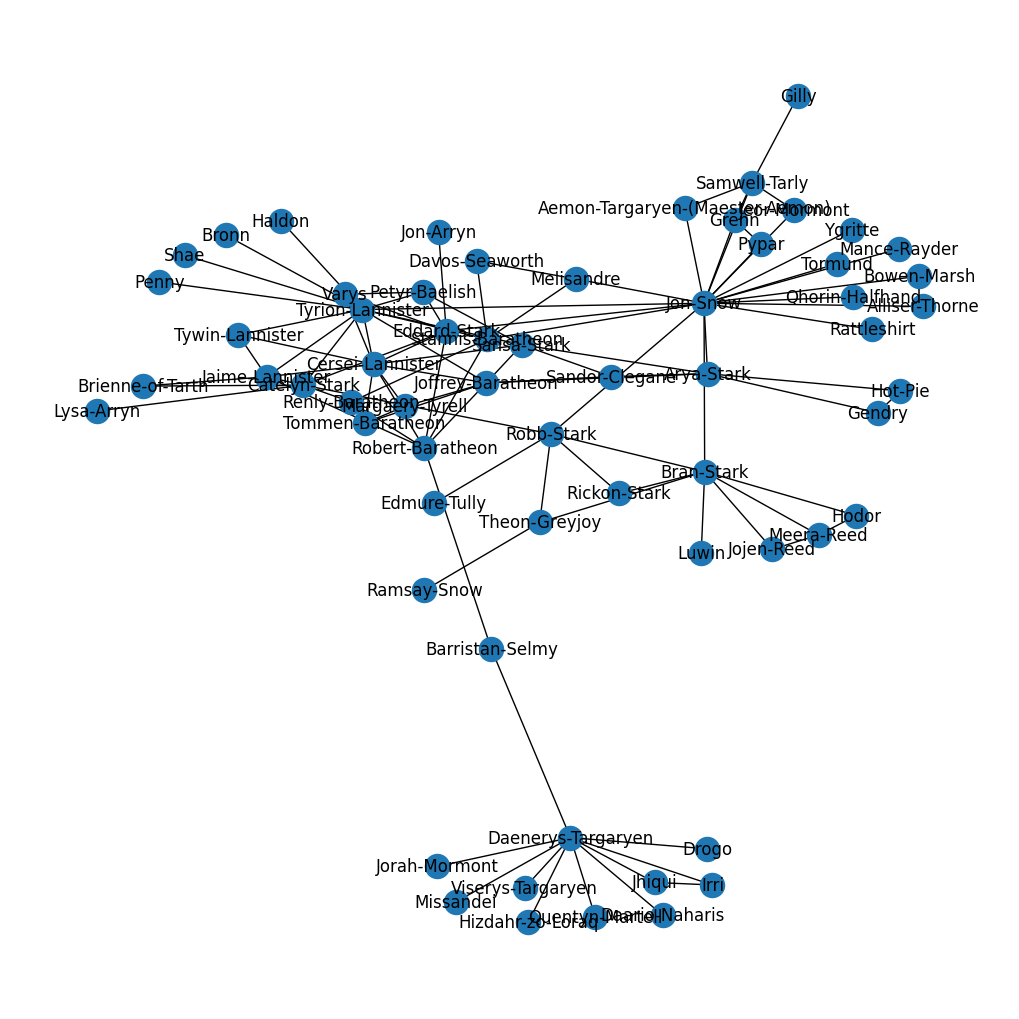

In [172]:
G = nx.from_pandas_edgelist(got[['source','target','weight']][got['weight']>50])
plt.figure(figsize=(10,10))
nx.draw_spring(G,with_labels=True)

In [183]:
[k for k,v in nx.centrality.harmonic_centrality(G).items() if v>25]

['Tyrion-Lannister',
 'Robb-Stark',
 'Cersei-Lannister',
 'Joffrey-Baratheon',
 'Stannis-Baratheon',
 'Sansa-Stark',
 'Bran-Stark',
 'Robert-Baratheon',
 'Jon-Snow',
 'Jaime-Lannister',
 'Arya-Stark',
 'Catelyn-Stark',
 'Eddard-Stark']

In [49]:
H = pn.Network(notebook=True)
H.from_nx(G)
H.show('got.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


# Star Wars Characters

The data is taken from [here](https://zenodo.org/record/1411479)

In [393]:
with requests.get('https://zenodo.org/record/1411479/files/evelinag/star-wars-network-data-1.0.1.zip') as url:
    zf = ZipFile(BytesIO(url.content))
    raw = json.loads(zf.open('evelinag-star-wars-network-data-04538e0/starwars-full-interactions-allCharacters-merged.json').read().decode('latin-1'))

In [394]:
raw['links']

[{'source': 0, 'target': 1, 'value': 32},
 {'source': 2, 'target': 0, 'value': 2},
 {'source': 0, 'target': 20, 'value': 5},
 {'source': 0, 'target': 4, 'value': 22},
 {'source': 0, 'target': 18, 'value': 41},
 {'source': 0, 'target': 21, 'value': 2},
 {'source': 0, 'target': 15, 'value': 12},
 {'source': 0, 'target': 22, 'value': 2},
 {'source': 0, 'target': 23, 'value': 8},
 {'source': 24, 'target': 0, 'value': 11},
 {'source': 0, 'target': 26, 'value': 3},
 {'source': 0, 'target': 27, 'value': 2},
 {'source': 0, 'target': 8, 'value': 47},
 {'source': 0, 'target': 29, 'value': 1},
 {'source': 0, 'target': 30, 'value': 1},
 {'source': 13, 'target': 0, 'value': 2},
 {'source': 0, 'target': 19, 'value': 4},
 {'source': 0, 'target': 32, 'value': 9},
 {'source': 0, 'target': 33, 'value': 2},
 {'source': 0, 'target': 34, 'value': 9},
 {'source': 0, 'target': 35, 'value': 1},
 {'source': 17, 'target': 0, 'value': 1},
 {'source': 38, 'target': 0, 'value': 2},
 {'source': 39, 'target': 0, 'va

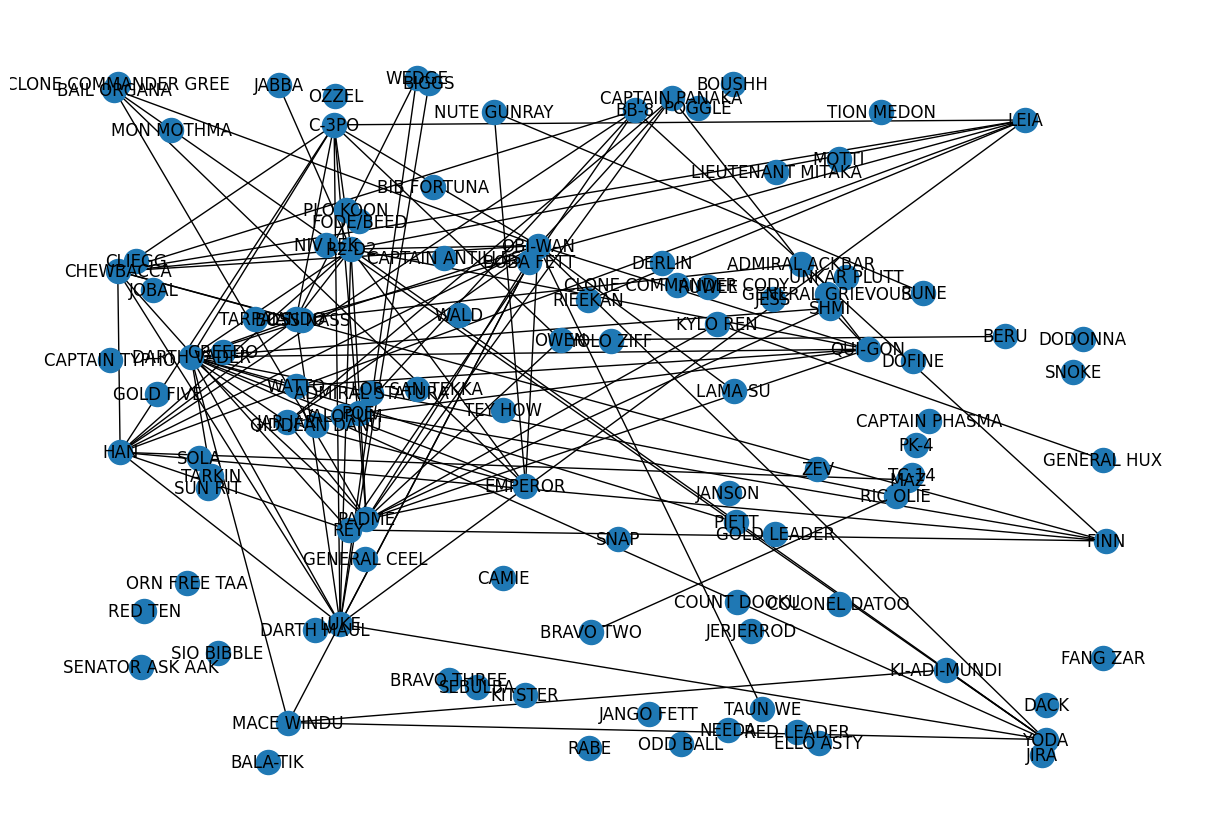

In [395]:
nodes = [x['name'] for x in raw['nodes']]
edges = [(nodes[x['source']],nodes[x['target']]) for x in raw['links'] if x['value']>3]
plt.figure(figsize=(12,8))
starwars = nx.Graph()
starwars.add_nodes_from(nodes)
starwars.add_edges_from(edges)
nx.draw_random(starwars, with_labels=True)

In [396]:
[k for k,v in nx.centrality.betweenness_centrality(starwars).items() if v>0.01]

['DARTH VADER',
 'R2-D2',
 'CHEWBACCA',
 'OBI-WAN',
 'EMPEROR',
 'C-3PO',
 'LUKE',
 'HAN',
 'LANDO',
 'REY']

In [397]:
SW = pn.Network(notebook=True)
SW.from_nx(starwars)
SW.show('starwars.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [50]:
with requests.get('https://www.gutenberg.org/files/76/76-0.txt') as url:
    finn = url.content[9762:591195]

In [123]:
sentences = nltk.sent_tokenize(finn.decode('utf-8'))

In [124]:
edges = []
for sentence in sentences:
    tagged_sentence = nltk.pos_tag(nltk.word_tokenize(sentence))
    names = []
    for chunk in nltk.ne_chunk(tagged_sentence):
        if hasattr(chunk, 'label') and chunk.label()=='PERSON':
            name = ' '.join([c[0] for c in chunk])
            names.append(name.lower())
    if len(names)>1:
        tmp = list(set(names))
        edges.extend(list(itertools.combinations(tmp, 2)))

In [125]:
weights = Counter(edges)
source = []
target = []
weight = []
for (x,y),w in weights.items():
    if w>1:
        source.append(x)
        target.append(y)
        weight.append(w)

In [126]:
G = nx.from_pandas_edgelist(pd.DataFrame({'source': source, 'target': target, 'weight': weight}))

In [127]:
N = pn.Network(notebook=True)
N.from_nx(G)
N.show('huckleberry_finn.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


# Political Blogs

The data is taken from [here](http://www-personal.umich.edu/~mejn/netdata/)

In [400]:
with requests.get('http://www-personal.umich.edu/~mejn/netdata/football.zip') as url:
    zf = ZipFile(BytesIO(url.content))

In [403]:
football = nx.read_gml(zf.open('football.gml'))
FB = pn.Network(notebook=True)
FB.from_nx(football)
FB.show('football.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [239]:
[k for k,v in nx.centrality.edge_betweenness_centrality(football).items() if v>0.012]

[('BrighamYoung', 'Syracuse'),
 ('KansasState', 'BallState'),
 ('Wyoming', 'CentralMichigan'),
 ('Alabama', 'UCLA'),
 ('BoiseState', 'CentralMichigan'),
 ('Washington', 'MiamiFlorida'),
 ('Ohio', 'IowaState'),
 ('Tulsa', 'NorthCarolina'),
 ('Missouri', 'Clemson')]

# London Public Transportation map

The data is taken from [here](https://manliodedomenico.com/data.php)

In [404]:
with requests.get('https://manliodedomenico.com/data/London_Multiplex_Transport.zip') as url:
    zf = ZipFile(BytesIO(url.content))

In [410]:
nodes = pd.read_csv(zf.open('London_Multiplex_Transport/Dataset/london_transport_nodes.txt'),sep=' ')
nodes

nodeID          nodeLabel    nodeLat  nodeLong
0         0          abbeyroad  51.531952  0.003738
1         1            westham  51.528526  0.005332
2         2       actoncentral  51.508758 -0.263416
3         3  willesdenjunction  51.532234 -0.243895
4         4          actontown  51.503071 -0.280288
..      ...                ...        ...       ...
364     364    watfordjunction  51.663883 -0.396158
365     365       westfinchley  51.609263 -0.188903
366     366        westruislip  51.569588 -0.437846
367     367          wimbledon  51.421108 -0.206648
368     368      wimbledonpark  51.434581 -0.199172

[369 rows x 4 columns]

In [406]:
edges = pd.read_csv(zf.open('London_Multiplex_Transport/Dataset/london_transport_multiplex.edges'),sep=' ',header=None)
del edges[0],edges[3]
edges.rename(columns={1: 'source', 2: 'target'}, inplace=True)
edges

source  target
0         1      77
1         1     106
2         1     219
3         1     321
4         3     224
..      ...     ...
436     269     270
437     269     291
438     289     290
439     290     324
440     291     323

[441 rows x 2 columns]

In [411]:
london = nx.from_pandas_edgelist(edges)
plt.figure(figsize=(18,18),dpi=400)
nx.draw_kamada_kawai(london,labels = {id: lab for i,(id,lab) in nodes[['nodeID','nodeLabel']].iterrows()})

In [268]:
L = pn.Network(notebook=True)
L.from_nx(london)
L.show('london.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [285]:
[nodes.iloc[k,1] for k,v in nx.centrality.betweenness_centrality(london).items() if v>0.15]

['stratford',
 'willesdenjunction',
 'liverpoolstreet',
 'bank',
 'kingscrossstpancras',
 'highbury&islington',
 'bakerstreet',
 'bondstreet',
 'finchleyroad',
 'greenpark',
 'waterloo',
 'westminster',
 'euston']

# NBA Season 2018-2019

The data is taken from [here](https://sports-statistics.com/database/basketball-data/nba/)

In [149]:
data = pd.read_csv('https://sports-statistics.com/database/basketball-data/nba/2018-19_pbp.csv')
data

Unnamed: 0  EVENTMSGACTIONTYPE  EVENTMSGTYPE  EVENTNUM   GAME_ID  \
0                0                   0            12         2  21800794   
1                1                   0            10         4  21800794   
2                2                   1             5         7  21800794   
3                3                   6             1         9  21800794   
4                4                   2             6        10  21800794   
...            ...                 ...           ...       ...       ...   
582463         431                   1             9       634  21801037   
582464         432                   0             8       635  21801037   
582465         433                  63             2       638  21801037   
582466         434                   0             4       639  21801037   
582467         435                   0            13       640  21801037   

                                 HOMEDESCRIPTION  NEUTRALDESCRIPTION  \
0                                            NaN                 NaN   
1       Jump Ball Ayton vs. Faried: Tip to Okobo                 NaN   
2              Jackson Bad Pass Turnover (P1.T1)                 NaN   
3                                            NaN                 NaN   
4               Bridges S.FOUL (P1.T1) (E.Dalen)                 NaN   
...                                          ...                 ...   
582463                                       NaN                 NaN   
582464                                       NaN                 NaN   
582465                                       NaN                 NaN   
582466              Kleber REBOUND (Off:5 Def:7)                 NaN   
582467                                       NaN                 NaN   

       PCTIMESTRING  PERIOD  PERSON1TYPE  ...  PLAYER3_ID  PLAYER3_NAME  \
0             12:00       1          0.0  ...           0           NaN   
1             12:00       1          4.0  ...     1629059    Elie Okobo   
2             11:39       1          4.0  ...           0           NaN   
3             11:31       1          5.0  ...           0           NaN   
4             11:31       1          4.0  ...           0           NaN   
...             ...     ...          ...  ...         ...           ...   
582463         0:04       4          3.0  ...           0           NaN   
582464         0:04       4          5.0  ...           0           NaN   
582465         0:02       4          5.0  ...           0           NaN   
582466         0:02       4          4.0  ...           0           NaN   
582467         0:00       4          0.0  ...           0           NaN   

        PLAYER3_TEAM_ABBREVIATION PLAYER3_TEAM_CITY PLAYER3_TEAM_ID  \
0                             NaN               NaN             NaN   
1                             PHX           Phoenix    1.610613e+09   
2                             NaN               NaN             NaN   
3                             NaN               NaN             NaN   
4                             NaN               NaN             NaN   
...                           ...               ...             ...   
582463                        NaN               NaN             NaN   
582464                        NaN               NaN             NaN   
582465                        NaN               NaN             NaN   
582466                        NaN               NaN             NaN   
582467                        NaN               NaN             NaN   

       PLAYER3_TEAM_NICKNAME      SCORE SCOREMARGIN  \
0                        NaN        NaN         NaN   
1                       Suns        NaN         NaN   
2                        NaN        NaN         NaN   
3                        NaN      2 - 0          -2   
4                        NaN        NaN         NaN   
...                      ...        ...         ...   
582463                   NaN        NaN         NaN   
582464                   NaN        

In [150]:
teams = pd.crosstab(data.PLAYER1_TEAM_ABBREVIATION,data.PLAYER2_TEAM_ABBREVIATION)
for x in teams.columns:
    teams.loc[x,x]=0 
teams

PLAYER2_TEAM_ABBREVIATION  ATL  BKN  BOS  CHA  CHI  CLE  DAL  DEN  DET  GSW  \
PLAYER1_TEAM_ABBREVIATION                                                     
ATL                          0  114  142  132  129  102   80   70   99   58   
BKN                         99    0  118  119  100  108   69   59   97   63   
BOS                        132  112    0  111   60  103   59   49  122   62   
CHA                        111  111  102    0   76   84   55   57  104   39   
CHI                        137  118   85   84    0  107   75   59   97   57   
CLE                         94  124  114  106   97    0   48   53  105   39   
DAL                         58   57   53   41   56   59    0   82   58  100   
DEN                         57   71   55   63   43   61   95    0   52  106   
DET                        100   96  125  111  108  129   62   56    0   44   
GSW                         65   54   63   59   72   56  123  146   61    0   
HOU                         48   55   62   53   68   63  123  122   72  109   
IND                        130   83   96   81   97   83   63   49  110   52   
LAC                         62   63   75   63   59   62  121  134   62  148   
LAL                         68   60   49   51   50   51  103   83   58   99   
MEM                         66   62   59   63   52   54  120   98   68  105   
MIA                        129  113  110  126   88   99   57   45  117   68   
MIL                        122  114   95  110  109   96   54   51  101   58   
MIN                         64   50   56   51   52   50   93  102   59  103   
NOP                         59   54   64   76   54   60  127  132   51   92   
NYK                        123  111  128   80   90   82   51   49  114   51   
OKC                         67   58   62   55   73   50  122  125   69   87   
ORL                        119   74   72   99   96   69   50   60  108   51   
PHI                        121  126  106  137   85   81   52   46  132   73   
PHX                         67   64   64   67   60   57  134  134   70  133   
POR                         49   61   46   54   47   46  127  121   51  104   
SAC                         67   67   66   62   54   40   81   87   63  115   
SAS                         62   46   46   53   53   53  103   91   38   78   
TOR                         93   97  109   82  112  120   61   55   97   53   
UTA                         66   68   67   59   51   57  127  120   62   93   
WAS                        128  129   91  109  118  108   62   52   82   58   

PLAYER2_TEAM_ABBREVIATION  ...  OKC  ORL  PHI  PHX  POR  SAC  SAS  TOR  UTA  \
PLAYER1_TEAM_ABBREVIATION  ...                                                
ATL                        ...   69  133  130   67   64   70   48  100   68   
BKN                        ...   60   76  137   52   67   57   52  130   58   
BOS                        ...   69   75  117   54   53   60   39  129   61   
CHA                        ...   66   93  133   63   51   48   42   67   50   
CHI                        ...   85  106  107   56   48   63   43  110   49   
CLE                        ...   65   79   77   62   45   49   55  122   53   
DAL                        ...  137   45   55  122  114   85  116   64  129   
DEN                        ...  132   51   56  128  111   88  115   46  136   
DET                        ...   63  100  141   58   54   58   47   89   68   
GSW                        ...  100   47   61  135  114  128   74   58   87   
HOU                        ...  136   57   63   85   82  101  101   51  145   
IND                        ...   53   96  117   47   53   64   52   90   52   
LAC                        ...  140   58   72  142  101  125  121   59  106   
LAL                        ...  109   51   68  121  123  118  129   64  125   
MEM                        ...  101   60   59   81  118  137  126   62  123   
MIA                        ...   57  120   99   53   50   62   49  115   53   
MIL                        ...   49   70   87   6

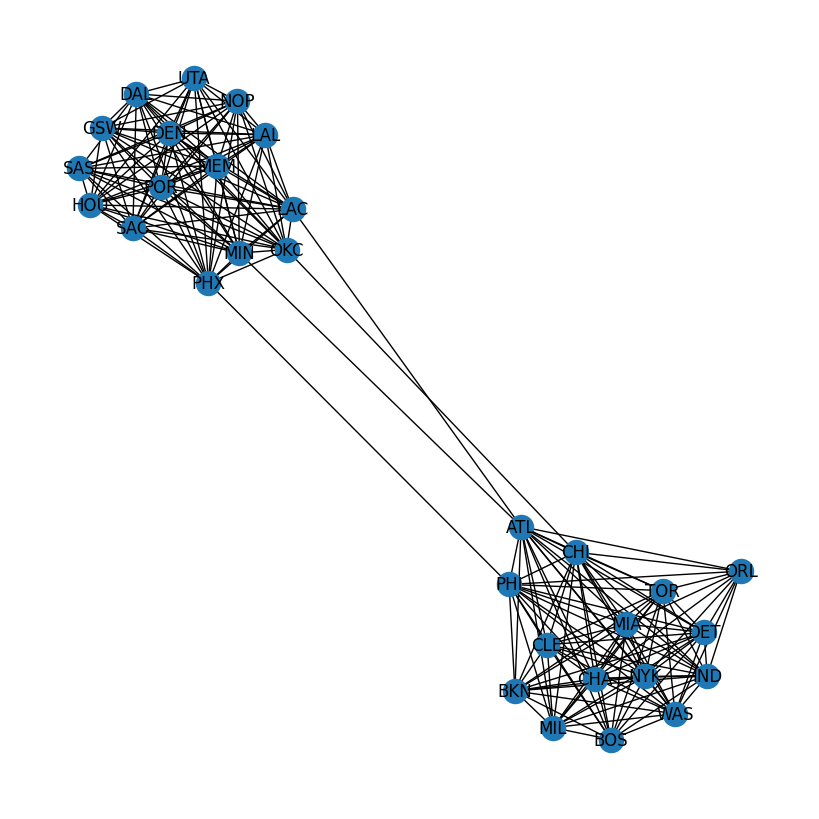

In [296]:
graphTeams = nx.from_pandas_adjacency(np.round(teams/160,0))
plt.figure(figsize=(8,8))
nx.draw_spring(graphTeams, with_labels=True)

In [304]:
[k for k,v in nx.centrality.harmonic_centrality(graphTeams).items() if v>20]

['ATL', 'MIN', 'OKC', 'PHX', 'LAC', 'CHI', 'PHI']

In [42]:
J = pn.Network(notebook=True)
J.from_nx(graphTeams)
J.show_buttons(filter_=['physics'])
J.show('nba_teams.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [163]:
players = pd.crosstab(data.PLAYER1_NAME,data.PLAYER2_NAME)
players

PLAYER2_NAME     Aaron Gordon  Aaron Holiday  Abdel Nader  Al Horford  \
PLAYER1_NAME                                                            
Aaron Gordon                0              0            0           2   
Aaron Holiday               0              0            0           0   
Abdel Nader                 1              0            0           0   
Al Horford                  0              0            0           0   
Al-Farouq Aminu             1              0            0           0   
...                       ...            ...          ...         ...   
Zach LaVine                 0              0            0           0   
Zach Lofton                 0              0            0           0   
Zaza Pachulia               0              1            0           0   
Zhaire Smith                0              0            0           0   
Zhou Qi                     0              0            0           0   

PLAYER2_NAME     Al-Farouq Aminu  Alan Williams  Alec Burks  Alex Abrines  \
PLAYER1_NAME                                                                
Aaron Gordon                   1              0           0             0   
Aaron Holiday                  0              0           0             0   
Abdel Nader                    0              0           1             0   
Al Horford                     1              0           1             0   
Al-Farouq Aminu                0              0           0             0   
...                          ...            ...         ...           ...   
Zach LaVine                    1              0           2             0   
Zach Lofton                    0              0           0             0   
Zaza Pachulia                  0              0           0             1   
Zhaire Smith                   0              0           0             0   
Zhou Qi                        0              0           0             0   

PLAYER2_NAME     Alex Caruso  Alex Len  ...  Wilson Chandler  Yante Maten  \
PLAYER1_NAME                            ...                                 
Aaron Gordon               0         2  ...                0            0   
Aaron Holiday              0         0  ...                0            0   
Abdel Nader                0         0  ...                0            0   
Al Horford                 0         0  ...                0            0   
Al-Farouq Aminu            0         0  ...                0            0   
...                      ...       ...  ...              ...          ...   
Zach LaVine                0         3  ...                0            0   
Zach Lofton                0         0  ...                0            0   
Zaza Pachulia              2         0  ...                0            0   
Zhaire Smith               0         0  ...                0            0   
Zhou Qi                    0         0  ...                0            0   

PLAYER2_NAME     Yogi Ferrell  Yuta Watanabe  Zach Collins  Zach LaVine  \
PLAYER1_NAME                                                              
Aaron Gordon                0              0             1            1   
Aaron Holiday               0              0             0            0   
Abdel Nader                 1              0             2            0   
Al Horford                  0              0             0            0   
Al-Farouq Aminu             0              0            64            0   
...                       ...            ...           ...          ...   
Zach LaVine                 0              0             0            0   
Zach Lofton                 0              0             0            0   
Zaza Pachulia               0              0             2            1   
Zhaire Smith                0              0             0            0   
Zhou Qi                     0              0             0            0   

PLAYER2_NAME     Zach Lofton  Zaza Pachulia  Zhaire Smith  Zhou Qi  
P

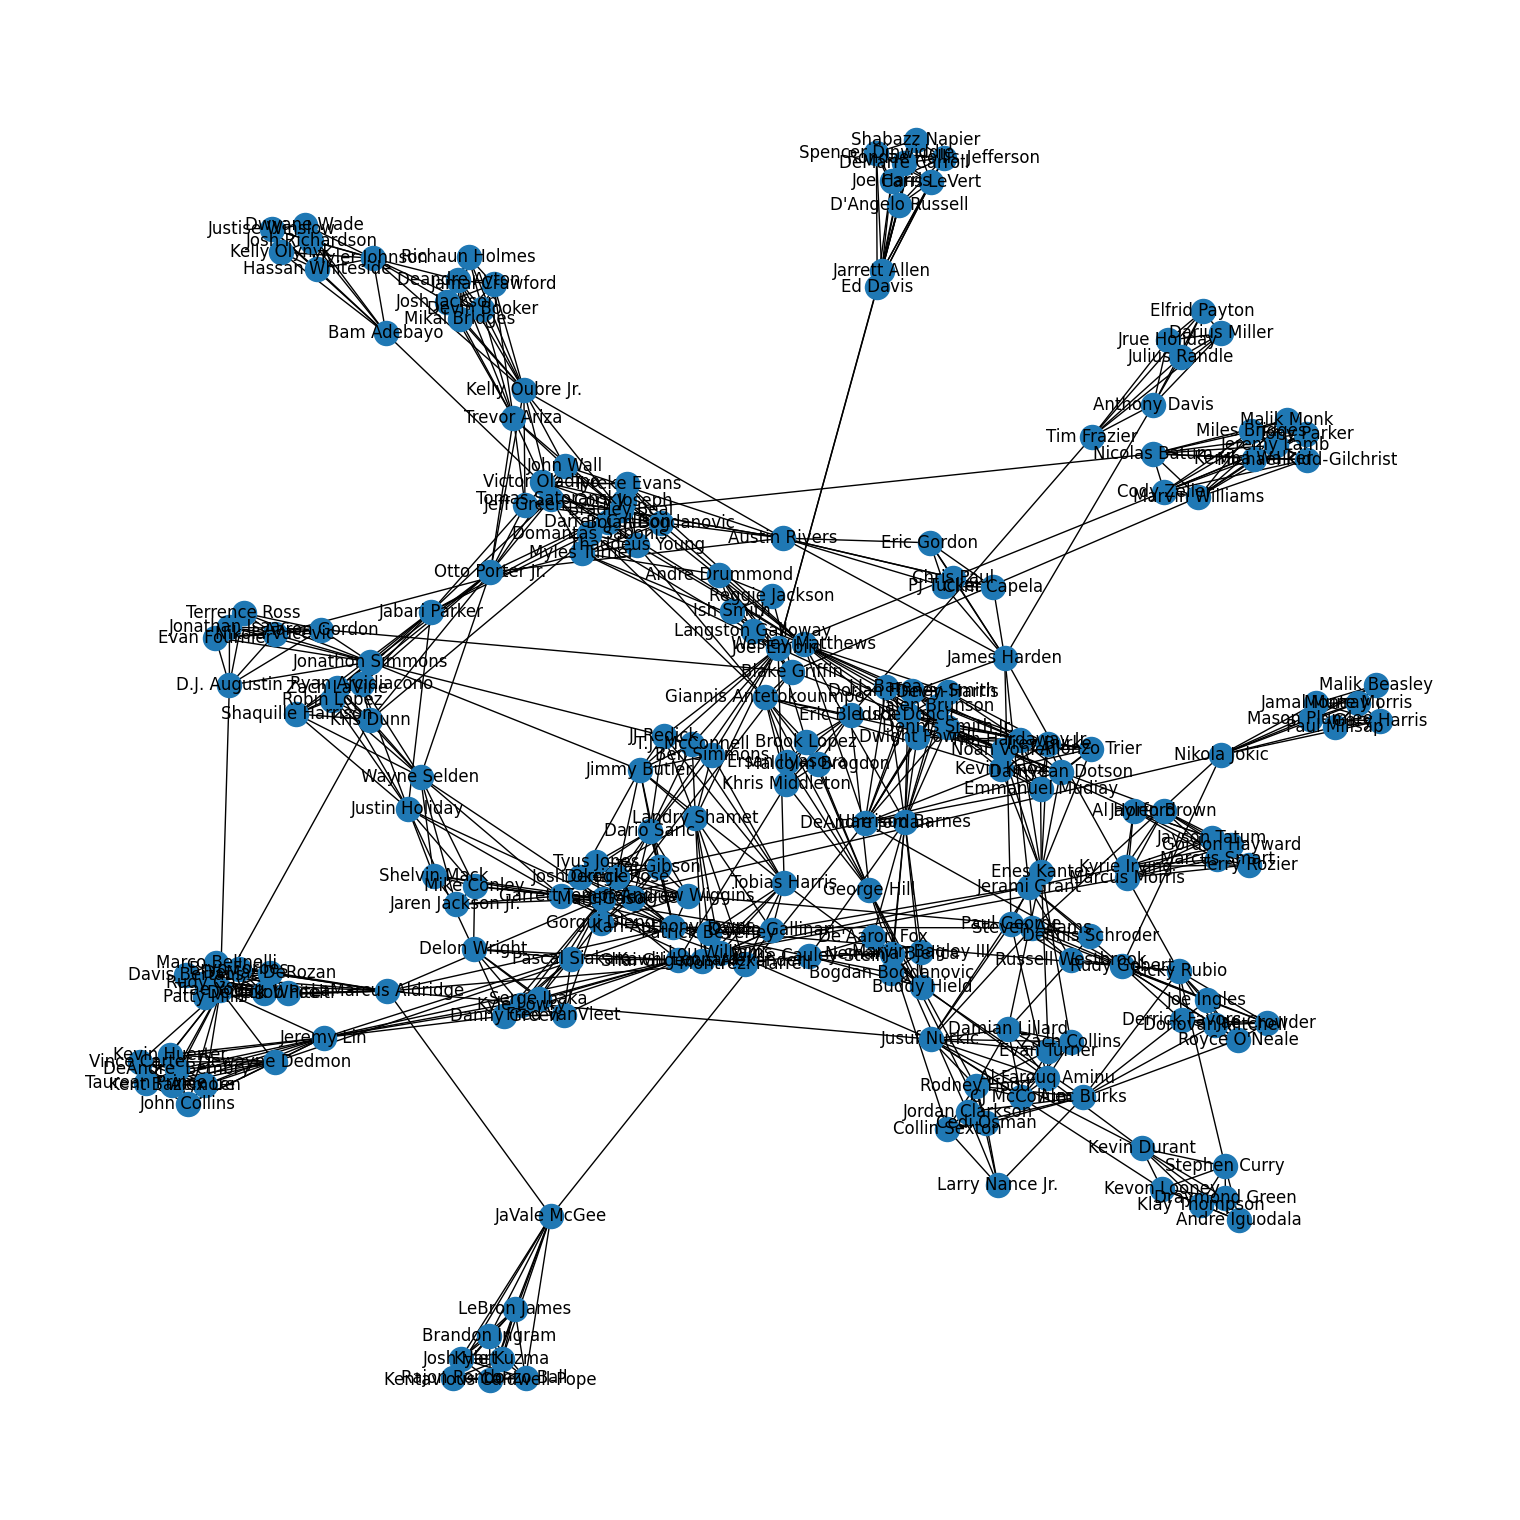

In [306]:
sel = players.sum(axis=0)>400

graphPlayers = nx.from_pandas_adjacency(np.round(players.loc[sel,sel]/16,0))
plt.figure(figsize=(15,15))
nx.draw_spring(graphPlayers,with_labels=True)

In [170]:
[k for k,v in nx.centrality.degree_centrality(graphPlayers).items() if v>0.06]

['DeAndre Jordan',
 'Harrison Barnes',
 'Jeremy Lin',
 'Joel Embiid',
 'Jusuf Nurkic',
 'Karl-Anthony Towns',
 'Kelly Oubre Jr.',
 'LaMarcus Aldridge',
 'Marc Gasol',
 'Wesley Matthews']

In [187]:
[k for k,v in nx.centrality.edge_betweenness_centrality(graphTeams).items() if v > 0.1]

[('ATL', 'LAC'), ('ATL', 'MIN'), ('CHI', 'OKC'), ('PHI', 'PHX')]

In [50]:
sel = players.sum(axis=0)>400
graphPlayers = nx.from_pandas_adjacency(np.round(players.loc[sel,sel]/16,0))
I = pn.Network(height=800,notebook=True)
I.from_nx(graphPlayers)
I.show('nba_players.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [185]:
[k for k,v in nx.centrality.betweenness_centrality(graphPlayers).items() if v > 0.1]

['Giannis Antetokounmpo',
 'James Harden',
 'Joel Embiid',
 'Karl-Anthony Towns',
 'LaMarcus Aldridge',
 'Marc Gasol']

# Top 500 Songs

The data is taken from [here](https://www.kaggle.com/datasets/omarhanyy/500-greatest-songs-of-all-time)

In [4]:
music = pd.read_csv('/home/kaygun/local/data/top_500_songs.csv', encoding='latin-1')
music

Number  Year                                  Album             Artist  \
0         1  1967  Sgt. Pepper's Lonely Hearts Club Band        The Beatles   
1         2  1966                             Pet Sounds     The Beach Boys   
2         3  1966                               Revolver        The Beatles   
3         4  1965                   Highway 61 Revisited          Bob Dylan   
4         5  1965                            Rubber Soul        The Beatles   
..      ...   ...                                    ...                ...   
495     496  1969                             Boz Scaggs         Boz Scaggs   
496     497  2001                      White Blood Cells  The White Stripes   
497     498  1989                        The Stone Roses    The Stone Roses   
498     499  1971               Live in Cook County Jail          B.B. King   
499     500  1998                               Aquemini            OutKast   

         Genre                                           Subgenre  
0         Rock                      Rock & Roll, Psychedelic Rock  
1         Rock                         Pop Rock, Psychedelic Rock  
2         Rock                         Psychedelic Rock, Pop Rock  
3         Rock                              Folk Rock, Blues Rock  
4    Rock, Pop                                           Pop Rock  
..         ...                                                ...  
495       Rock                                           Pop Rock  
496       Rock  Indie Rock, Alternative Rock, Blues Rock, Gara...  
497       Rock                                         Indie Rock  
498      Blues                                     Electric Blues  
499    Hip Hop                   Reggae, Gangsta, Soul, Conscious  

[500 rows x 6 columns]

In [122]:
producers = []
for x in music['producer']:
    producers.extend([y.strip() for y in x.split(',')])

producers = list(set(producers))
artists = list(set(music['artist']))
    
d = pd.DataFrame(0, index=artists, columns=producers)

for i,(a,ps) in music[['artist','producer']].iterrows():
    for p in ps.split(','):
        d.loc[a,p.strip()] += 1
        
d.fillna(0,inplace=True)
r = np.matmul(d,d.T)
r.columns = d.index
for x in d.index:
    r.loc[x,x]=0

plt.figure(figsize=(12,12))
musicians = nx.from_pandas_adjacency(r)
A = pn.Network(notebook=True)
A.from_nx(musicians)
A.show('musicians.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


/tmp/ipykernel_6209/4275347339.py:15: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  r = np.matmul(d,d.T)


<Figure size 1200x1200 with 0 Axes>

In [123]:
writers = []
for x in music['writers']:
    writers.extend([y.strip() for y in x.split(',')])

writers = list(set(writers))
artists = list(set(music['artist']))
    
d = pd.DataFrame(0, index=artists, columns=writers)

for i,(a,ps) in music[['artist','writers']].iterrows():
    for p in ps.split(','):
        d.loc[a,p.strip()] += 1
        
d.fillna(0,inplace=True)
r = np.matmul(d,d.T)
r.columns = d.index
for x in d.index:
    r.loc[x,x]=0

plt.figure(figsize=(12,12))
musicians = nx.from_pandas_adjacency(r)
A = pn.Network(notebook=True)
A.from_nx(musicians)
A.show('musicians.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


/tmp/ipykernel_6209/2017227182.py:15: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  r = np.matmul(d,d.T)


<Figure size 1200x1200 with 0 Axes>

In [136]:
edges = []
nodes = []

for x in music['writers']:
    tmp = [y.strip() for y in x.split(',')]
    nodes.extend(tmp)
    if len(tmp)>1:
        edges.extend(list(itertools.combinations(tmp,2)))
        
A = pn.Network(notebook=True)
A.add_nodes(nodes)
A.add_edges(edges)
A.show('writers.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [138]:
edges = []
nodes = []

for x in music['producer']:
    tmp = [y.strip() for y in x.split(',')]
    nodes.extend(tmp)
    if len(tmp)>1:
        edges.extend(list(itertools.combinations(tmp,2)))
        
A = pn.Network(notebook=True)
A.add_nodes(nodes)
A.add_edges(edges)
A.show('producers.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


# Corporate Ownership Network

Data is taken from [here](https://math.nist.gov/~RPozo/complex_datasets.html)

In [356]:
with requests.get('http://vlado.fmf.uni-lj.si/pub/networks/data/econ/Eva/EVA.zip') as url:
    zf = ZipFile(BytesIO(url.content))
    corps = zf.open('eva.net').read().decode('latin-1')
    names = zf.open('names.txt').read().decode('latin-1')

In [386]:
edges = []
nodes = {}
raw = corps.split('\n')
for x in raw:
    if x.startswith('*ver'):
        flag = True
        continue
    elif x.startswith('*arc'):
        flag = False
        continue 
    if flag:
        tmp = x.split('"')
        if len(tmp)>1:
            s = int(tmp[0].strip())
            t = tmp[1].strip()
            nodes.update({s: t})
    else:
        tmp = re.sub(r'[\s]+',' ',x).split()
        if len(tmp)>1:
            s = int(tmp[0].strip())
            t = int(tmp[1].strip())
            edges.append((s,t))

In [389]:
corpGraph = nx.from_edgelist(edges)
[nodes.get(k) for k,v in nx.centrality.degree_centrality(corpGraph).items() if v>0.02]

['News',
 'CNHI',
 'Clear Channel Communications',
 'Lee Enterprises',
 'Liberty Group Publishing',
 'CBS RADIO - Infinity Broadcasting']

In [384]:
CG = pn.Network(notebook=True)
CG.from_nx(corpGraph)
CG.show('corporate.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 
